In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
data = yf.download("SPY AAPL",start='2020-01-01',end='2021-09-30')

[*********************100%***********************]  2 of 2 completed


In [3]:
data

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2020-01-02   73.561554  309.694946   75.087502  324.869995   75.150002   
2020-01-03   72.846367  307.349823   74.357498  322.410004   75.144997   
2020-01-06   73.426826  308.522369   74.949997  323.640015   74.989998   
2020-01-07   73.081497  307.654938   74.597504  322.730011   75.224998   
2020-01-08   74.257095  309.294556   75.797501  324.450012   76.110001   
...                ...         ...         ...         ...         ...   
2021-09-23  145.770004  434.578156  146.830002  443.179993  147.080002   
2021-09-24  145.859344  435.294006  146.919998  443.910004  147.470001   
2021-09-27  144.320526  434.048645  145.369995  442.640015  145.960007   
2021-09-28  140.885529  425.301758  141.910004  433.720001  144.750000   
2021-09-29  141.798889  426.017609  142.830002  434.450012  144.449997   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2020-01-02  324.890015   73.797501  322.529999   74.059998  323.540009   
2020-01-03  323.640015   74.125000  321.100006   74.287498  321.160004   
2020-01-06  323.730011   73.187500  320.359985   73.447502  320.489990   
2020-01-07  323.540009   74.370003  322.239990   74.959999  323.019989   
2020-01-08  325.779999   74.290001  322.670013   74.290001  322.940002   
...                ...         ...         ...         ...         ...   
2021-09-23  444.890015  145.639999  439.600006  146.649994  439.850006   
2021-09-24  444.670013  145.559998  441.209991  145.660004  441.440002   
2021-09-27  444.049988  143.820007  441.899994  145.470001  442.809998   
2021-09-28  440.040009  141.690002  432.940002  143.250000  439.690002   
2021-09-29  437.040009  142.029999  433.850006  142.470001  435.190002   

               Volume             
                 AAPL        SPY  
Date                              
2020-01-02  135480400   59151200  
2020-01-03  146322800   77709700  
2020-01-06  118387200   55653900  
2020-01-07  108872000   40496400  
2020-01-08  132079200   68296000  
...               ...        ...  
2021-09-23   64838200   76396000  
2021-09-24   53477900   62094800  
2021-09-27   74150700   61371100  
2021-09-28  108972300  130436300  
2021-09-29   74602000   82329200  

[440 rows x 12 columns]

# note scatter plot need only 1 value to analyst , close , high

In [4]:
df = data.Close.copy()

In [5]:
df

,AAPL,SPY
Date,,
2020-01-02,75.087502,324.869995
2020-01-03,74.357498,322.410004
2020-01-06,74.949997,323.640015
2020-01-07,74.597504,322.730011
2020-01-08,75.797501,324.450012
...,...,...
2021-09-23,146.830002,443.179993
2021-09-24,146.919998,443.910004
2021-09-27,145.369995,442.640015


<AxesSubplot:xlabel='Date'>

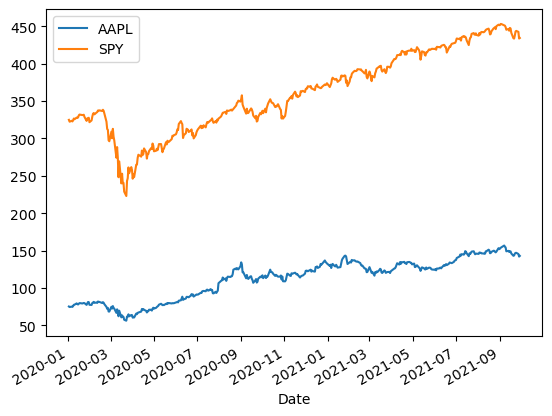

In [7]:
df.plot()

<AxesSubplot:xlabel='Date'>

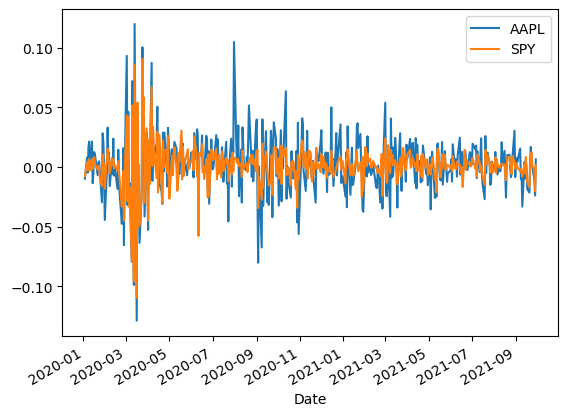

In [6]:
df.pct_change(1).plot()

In [8]:
df_return = df.pct_change(1)

<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

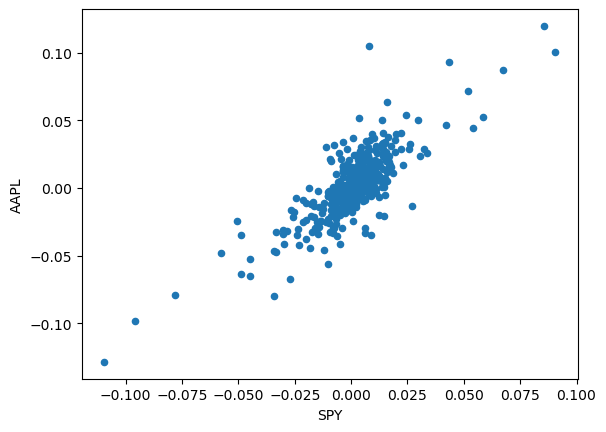

In [9]:
df_return.plot.scatter(x="SPY",y='AAPL')

<AxesSubplot:xlabel='AAPL', ylabel='SPY'>

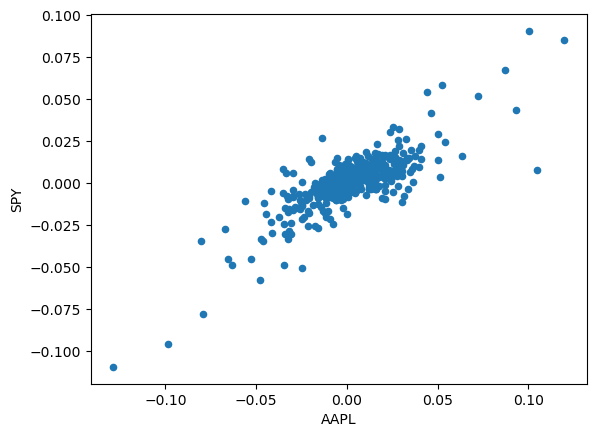

In [10]:
df_return.plot.scatter(x="AAPL",y='SPY')

<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

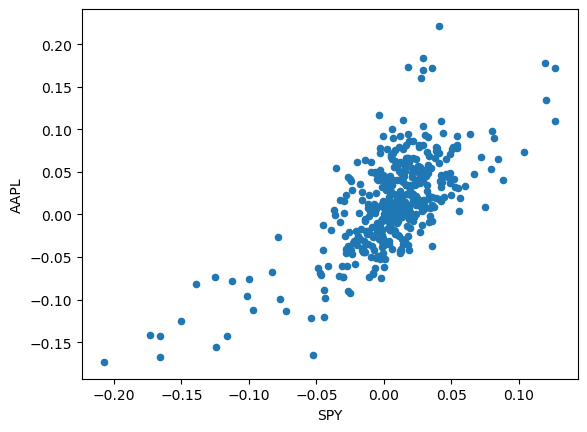

In [11]:
 df.pct_change(7).plot.scatter(x="SPY",y='AAPL')
    # weekly

In [12]:
x=df_return.SPY
y=df_return.AAPL

In [13]:
m,c=np.polyfit(x,y,1)
# 1 is meaning linear line

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
# error cause we have nan must clean before use

In [14]:
x.head()

Date
2020-01-02         NaN
2020-01-03   -0.007572
2020-01-06    0.003815
2020-01-07   -0.002812
2020-01-08    0.005330
Name: SPY, dtype: float64

In [15]:
y.head()

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
Name: AAPL, dtype: float64

In [16]:
x=x.dropna()
y=y.dropna()

In [17]:
type(x)

pandas.core.series.Series

In [18]:
m,c=np.polyfit(x,y,1)


In [19]:
m
# m is steep

1.1781538129902969

In [20]:
c
# c is intersection

0.0008199830242435805

In [22]:
import matplotlib.pyplot as plt

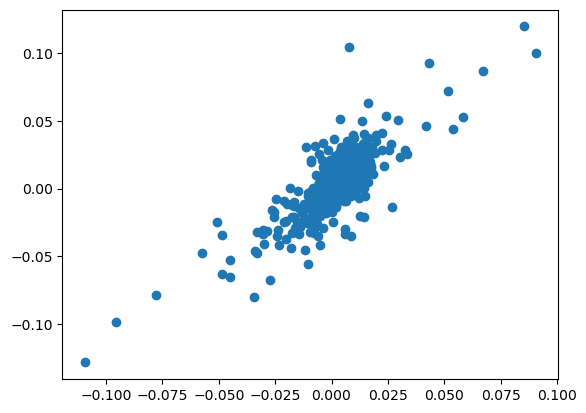

In [23]:
plt.plot(x,y,'o')

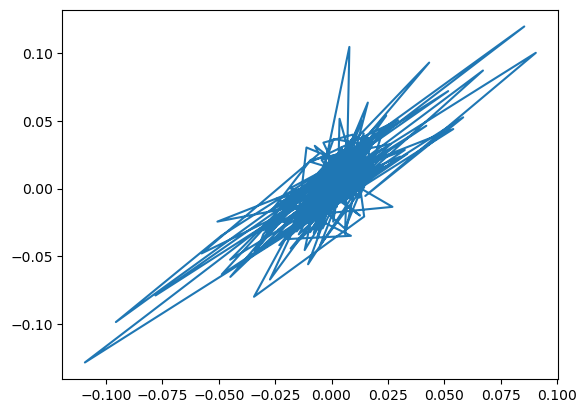

In [25]:
plt.plot(x,y)
# if we don't assignt marker will plot line 1- 2 -3 -4 like this 

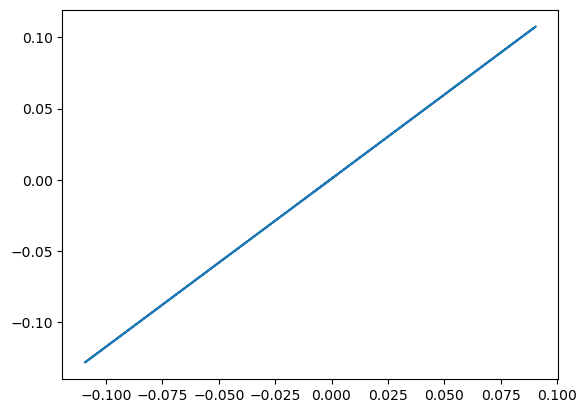

In [28]:
plt.plot(x,m*x+c)

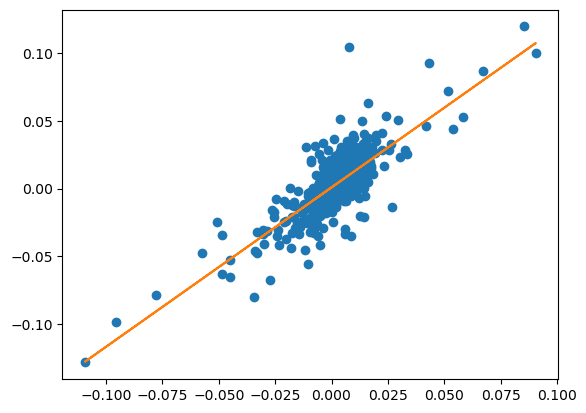

In [27]:
plt.plot(x,y,'o')
plt.plot(x,m*x+c)

In [ ]:
# note m+c is near 0 it mean is very impact between apple and spy

In [29]:
x

Date
2020-01-03   -0.007572
2020-01-06    0.003815
2020-01-07   -0.002812
2020-01-08    0.005330
2020-01-09    0.006781
                ...   
2021-09-23    0.012150
2021-09-24    0.001647
2021-09-27   -0.002861
2021-09-28   -0.020152
2021-09-29    0.001683
Name: SPY, Length: 439, dtype: float64

In [31]:
type(x)
# series data must change to numpy array will canuse numpy function


pandas.core.series.Series

In [33]:
x.values

array([-7.57223348e-03,  3.81505218e-03, -2.81177735e-03,  5.32953603e-03,
        6.78064912e-03, -2.87770537e-03,  6.87734737e-03, -1.52462260e-03,
        2.25985710e-03,  8.31838559e-03,  3.11253094e-03, -1.95819970e-03,
        1.20762289e-04,  1.14687296e-03, -8.89307909e-03, -1.60294102e-02,
        1.04791797e-02, -8.26025633e-04,  3.24535416e-03, -1.81579035e-02,
        7.42853961e-03,  1.52412764e-02,  1.15480089e-02,  3.36485515e-03,
       -5.32965663e-03,  7.46532323e-03,  1.73304979e-03,  6.44277158e-03,
       -1.06696655e-03,  1.60211401e-03, -2.57699971e-03,  4.78123511e-03,
       -4.10824657e-03, -1.02982671e-02, -3.31653988e-02, -3.03021498e-02,
       -3.67821500e-03, -4.49116861e-02, -4.20153931e-03,  4.33065083e-02,
       -2.86324572e-02,  4.20330253e-02, -3.32416876e-02, -1.65311120e-02,
       -7.80944703e-02,  5.17448925e-02, -4.87484482e-02, -9.56771619e-02,
        8.54863031e-02, -1.09423735e-01,  5.39920643e-02, -5.06329229e-02,
        2.12497711e-03, -

In [34]:
type(x.values)

numpy.ndarray

In [35]:
x.to_numpy()

array([-7.57223348e-03,  3.81505218e-03, -2.81177735e-03,  5.32953603e-03,
        6.78064912e-03, -2.87770537e-03,  6.87734737e-03, -1.52462260e-03,
        2.25985710e-03,  8.31838559e-03,  3.11253094e-03, -1.95819970e-03,
        1.20762289e-04,  1.14687296e-03, -8.89307909e-03, -1.60294102e-02,
        1.04791797e-02, -8.26025633e-04,  3.24535416e-03, -1.81579035e-02,
        7.42853961e-03,  1.52412764e-02,  1.15480089e-02,  3.36485515e-03,
       -5.32965663e-03,  7.46532323e-03,  1.73304979e-03,  6.44277158e-03,
       -1.06696655e-03,  1.60211401e-03, -2.57699971e-03,  4.78123511e-03,
       -4.10824657e-03, -1.02982671e-02, -3.31653988e-02, -3.03021498e-02,
       -3.67821500e-03, -4.49116861e-02, -4.20153931e-03,  4.33065083e-02,
       -2.86324572e-02,  4.20330253e-02, -3.32416876e-02, -1.65311120e-02,
       -7.80944703e-02,  5.17448925e-02, -4.87484482e-02, -9.56771619e-02,
        8.54863031e-02, -1.09423735e-01,  5.39920643e-02, -5.06329229e-02,
        2.12497711e-03, -

In [36]:
type(x.to_numpy())

numpy.ndarray

In [ ]:
# try spy first

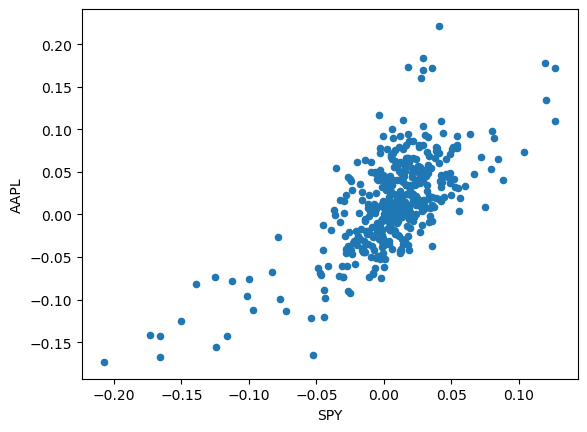

In [38]:
df_spy_main= df.pct_change(7).plot.scatter(x="SPY",y='AAPL')


In [45]:
x1=df_return.AAPL
y1=df_return.SPY

In [46]:
x1=x1.dropna()
y1=y1.dropna()

In [47]:
m1,c1=np.polyfit(x1,y1,1)

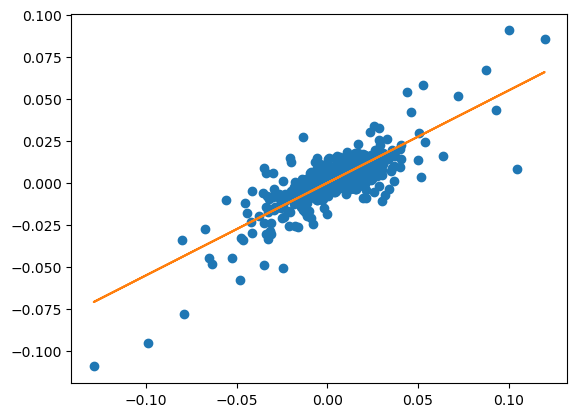

In [48]:
plt.plot(x1,y1,'o')
plt.plot(x1,m1*x1+c1)

In [49]:
m1

0.5508975097881392

In [50]:
c1

-0.00016916002140366079